# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Lasso, LassoCV, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [3]:
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]
print(numeric_df.describe())


             LotArea     LotArea_M  OverallQual  OverallCond    YearBuilt  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    977.044879     6.099315     5.575342  1971.267808   
std      9981.264932    927.289456     1.382997     1.112799    30.202904   
min      1300.000000    120.773900     1.000000     1.000000  1872.000000   
25%      7553.500000    701.742811     5.000000     5.000000  1954.000000   
50%      9478.500000    880.581085     6.000000     5.000000  1973.000000   
75%     11601.500000   1077.814155     7.000000     6.000000  2000.000000   
max    215245.000000  19996.906235    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M    GrLivArea  GrLivArea_M  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452      98.238368  1515.463699   140.791124   
std       20.645407   438.705324      40.757041   525.480383    48.818704  

2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [11]:
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
df_cleaned = numeric_df.drop(columns=['LotArea_M', 'GrLivArea_M', 'GarageArea_M','TotalBsmtSF_M']) #у них корреляция равна одному, они не нужны

                LotArea  LotArea_M  OverallQual  OverallCond  YearBuilt  \
LotArea        1.000000   1.000000     0.105806    -0.005636   0.014228   
LotArea_M      1.000000   1.000000     0.105806    -0.005636   0.014228   
OverallQual    0.105806   0.105806     1.000000    -0.091932   0.572323   
OverallCond   -0.005636  -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt      0.014228   0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd   0.013788   0.013788     0.550684     0.073741   0.592855   
TotalBsmtSF    0.260833   0.260833     0.537808    -0.171098   0.391452   
TotalBsmtSF_M  0.260833   0.260833     0.537808    -0.171098   0.391452   
GrLivArea      0.263116   0.263116     0.593007    -0.079686   0.199010   
GrLivArea_M    0.263116   0.263116     0.593007    -0.079686   0.199010   
Bath           0.096360   0.096360     0.554555    -0.172989   0.478016   
GarageArea     0.180403   0.180403     0.562022    -0.151521   0.478954   
GarageArea_M   0.180403  

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

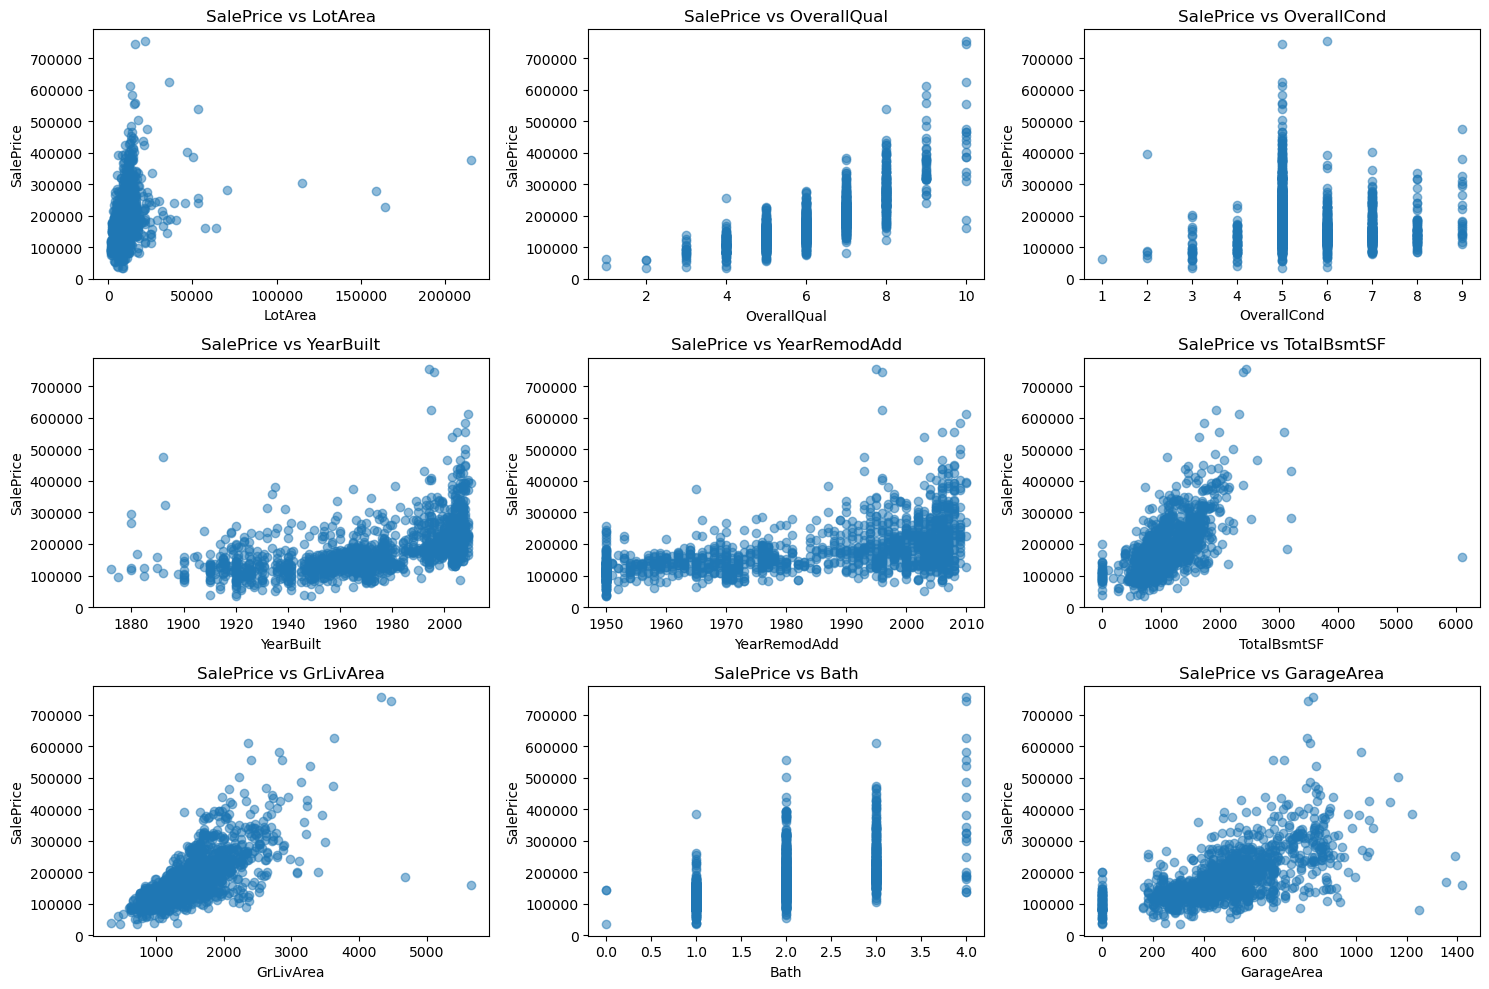

In [13]:
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'TotalBsmtSF', 'GrLivArea', 'Bath', 'GarageArea']


plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'SalePrice vs {feature}')
plt.tight_layout()
plt.show()

4. Сделайте предварительные выводы.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [18]:
df_cleaned['HouseAge'] = 2008 - df_cleaned['YearBuilt'] #возраст дома на момент продажи.
df_cleaned['TimeSinceRemod'] = 2008 - df_cleaned['YearRemodAdd'] #время с последнего ремонта.
df_cleaned['TotalArea'] = df['GrLivArea'] + df_cleaned['TotalBsmtSF'] #суммарная площадь дома.
df_cleaned['BathPerArea'] = df_cleaned['Bath'] / df_cleaned['GrLivArea'] #количество ванных комнат на единицу жилой площади
df_cleaned['GarageToLivingRatio'] = df_cleaned['GarageArea'] / df_cleaned['GrLivArea'] #соотношение площади гаража к жилой площади
df_cleaned['QualCondScore'] = df_cleaned['OverallQual'] * df_cleaned['OverallCond'] #комбинация качества и состояния дома
df_cleaned['LogSalePrice'] = np.log(df_cleaned['SalePrice']) #логарифмированная цена, так как цена скошена вправа
 
df_cleaned.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,HouseAge,TimeSinceRemod,TotalArea,BathPerArea,GarageToLivingRatio,QualCondScore,LogSalePrice
0,8450,7,5,2003,2003,856,1710,3,548,208500,5,5,2566,0.001754,0.320468,35,12.247694
1,9600,6,8,1976,1976,1262,1262,2,460,181500,32,32,2524,0.001585,0.364501,48,12.109011
2,11250,7,5,2001,2002,920,1786,3,608,223500,7,6,2706,0.001680,0.340426,35,12.317167
3,9550,7,5,1915,1970,756,1717,1,642,140000,93,38,2473,0.000582,0.373908,35,11.849398
4,14260,8,5,2000,2000,1145,2198,3,836,250000,8,8,3343,0.001365,0.380346,40,12.429216


## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [20]:
X = df_cleaned.drop(columns=['SalePrice', 'LogSalePrice'])  
y = df_cleaned['LogSalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [23]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat_encoded = onehot_encoder.fit_transform(X_train[categorical_cols])
X_test_cat_encoded = onehot_encoder.transform(X_test[categorical_cols])
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, 
                              columns=onehot_encoder.get_feature_names_out(categorical_cols),
                              index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded,
                             columns=onehot_encoder.get_feature_names_out(categorical_cols),
                             index=X_test.index)
X_train_final = pd.concat([X_train[numeric_cols], X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test[numeric_cols], X_test_cat_df], axis=1)

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [25]:
scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_numeric_scaled = scaler.transform(X_test[numeric_cols])

X_train_numeric_df = pd.DataFrame(X_train_numeric_scaled, 
                                  columns=numeric_cols,
                                  index=X_train.index)
X_test_numeric_df = pd.DataFrame(X_test_numeric_scaled,
                                 columns=numeric_cols,
                                 index=X_test.index)

X_train_final = pd.concat([X_train_numeric_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_numeric_df, X_test_cat_df], axis=1)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [39]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

weights = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Weight': lr_model.coef_
})
intercept = lr_model.intercept_
y_train_pred = lr_model.predict(X_train_final)
y_test_pred = lr_model.predict(X_test_final)

print("Пересечение (intercept):", intercept)
print("\nВеса признаков:")
print(weights)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nМетрики качества:")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

Пересечение (intercept): 12.030651883324607

Веса признаков:
                Feature    Weight
0               LotArea  0.032795
1           OverallQual  0.101059
2           OverallCond  0.038108
3             YearBuilt  0.045523
4          YearRemodAdd  0.012392
5           TotalBsmtSF  0.053209
6             GrLivArea -0.041204
7                  Bath  0.218227
8            GarageArea  0.045514
9              HouseAge -0.045523
10       TimeSinceRemod -0.012392
11            TotalArea  0.002235
12          BathPerArea -0.154176
13  GarageToLivingRatio  0.006162
14        QualCondScore  0.023775

Метрики качества:
Train MSE: 0.0239
Test MSE: 0.0261
Train R2: 0.8434
Test R2: 0.8601


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [37]:
random_state = 42

alphas = np.logspace(-4, 2, 50) 

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=random_state)
lasso_cv.fit(X_train_final, y_train)

best_alpha = lasso_cv.alpha_
print(f"Лучший параметр alpha: {best_alpha}")

lasso_model = Lasso(alpha=best_alpha, random_state=random_state)
lasso_model.fit(X_train_final, y_train)

weights = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Weight': lasso_model.coef_
})
intercept = lasso_model.intercept_

y_train_pred = lasso_model.predict(X_train_final)
y_test_pred = lasso_model.predict(X_test_final)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("\nМетрики качества:")
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")

print("\nПересечение (intercept):", intercept)
print("\nВеса признаков:")
print(weights)

Лучший параметр alpha: 0.0012648552168552957

Метрики качества:
Train MAE: 0.1043
Test MAE: 0.1072
Train MSE: 0.0240
Test MSE: 0.0257
Train R2: 0.8424
Test R2: 0.8624

Пересечение (intercept): 12.030651883324607

Веса признаков:
                Feature    Weight
0               LotArea  0.031358
1           OverallQual  0.091765
2           OverallCond  0.029197
3             YearBuilt  0.092045
4          YearRemodAdd  0.023952
5           TotalBsmtSF  0.049661
6             GrLivArea -0.000000
7                  Bath  0.166121
8            GarageArea  0.048218
9              HouseAge -0.002318
10       TimeSinceRemod -0.000451
11            TotalArea  0.000000
12          BathPerArea -0.119116
13  GarageToLivingRatio  0.003262
14        QualCondScore  0.035700


Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [36]:
ridge = Ridge(random_state=42)


param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_final, y_train)


best_alpha = grid_search.best_params_['alpha']
print(f"Лучший параметр alpha: {best_alpha}")

best_ridge = Ridge(alpha=best_alpha, random_state=42)
best_ridge.fit(X_train_final, y_train)

y_train_pred = best_ridge.predict(X_train_final)
y_test_pred = best_ridge.predict(X_test_final)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("\nМетрики качества модели:")
print(f"Обучающая выборка: MAE = {train_mae:.2f}, MSE = {train_mse:.2f}, R^2 = {train_r2:.4f}")
print(f"Тестовая выборка: MAE = {test_mae:.2f}, MSE = {test_mse:.2f}, R^2 = {test_r2:.4f}")


difference_mae = abs(train_mae - test_mae)
difference_mse = abs(train_mse - test_mse)
print(f"\nРазница между MAE (обучение - тест): {difference_mae:.2f}")
print(f"Разница между MSE (обучение - тест): {difference_mse:.2f}")
feature_names = X_train_final.columns
weights = pd.DataFrame(best_ridge.coef_, index=feature_names, columns=['Weight'])
print("\nВеса признаков:")
print(weights)

Лучший параметр alpha: 10.0

Метрики качества модели:
Обучающая выборка: MAE = 0.10, MSE = 0.02, R^2 = 0.8426
Тестовая выборка: MAE = 0.11, MSE = 0.03, R^2 = 0.8625

Разница между MAE (обучение - тест): 0.00
Разница между MSE (обучение - тест): 0.00

Веса признаков:
                       Weight
LotArea              0.032378
OverallQual          0.091265
OverallCond          0.030281
YearBuilt            0.047485
YearRemodAdd         0.012583
TotalBsmtSF          0.042877
GrLivArea           -0.013037
Bath                 0.170367
GarageArea           0.047429
HouseAge            -0.047485
TimeSinceRemod      -0.012583
TotalArea            0.014649
BathPerArea         -0.122273
GarageToLivingRatio  0.004572
QualCondScore        0.035913


Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 